In [5]:
import numpy as np
import matplotlib.pyplot as plt
import function as func
import os
import sys

outdir = './plot/result_figure/yfactor2/'
if not os.path.isdir(outdir):
    os.makedirs(outdir)
    pass

#yfactor_file = "/data/ms2840a/result_data/yfactor_result_rebin2MHz.csv"
yfactor_file = "./output//result_data_newrebin1/yfactor_result2_rebin2MHz.csv"
yfactor_file2 = ''
#yfactor_file2 = "./output/result_data/yfactor_result_rebin2MHz.csv"

# Get data

In [10]:
data = func.csv_to_array(yfactor_file)
data2 = None if yfactor_file2=='' else func.csv_to_array(yfactor_file2)

# Power 77K & 300K

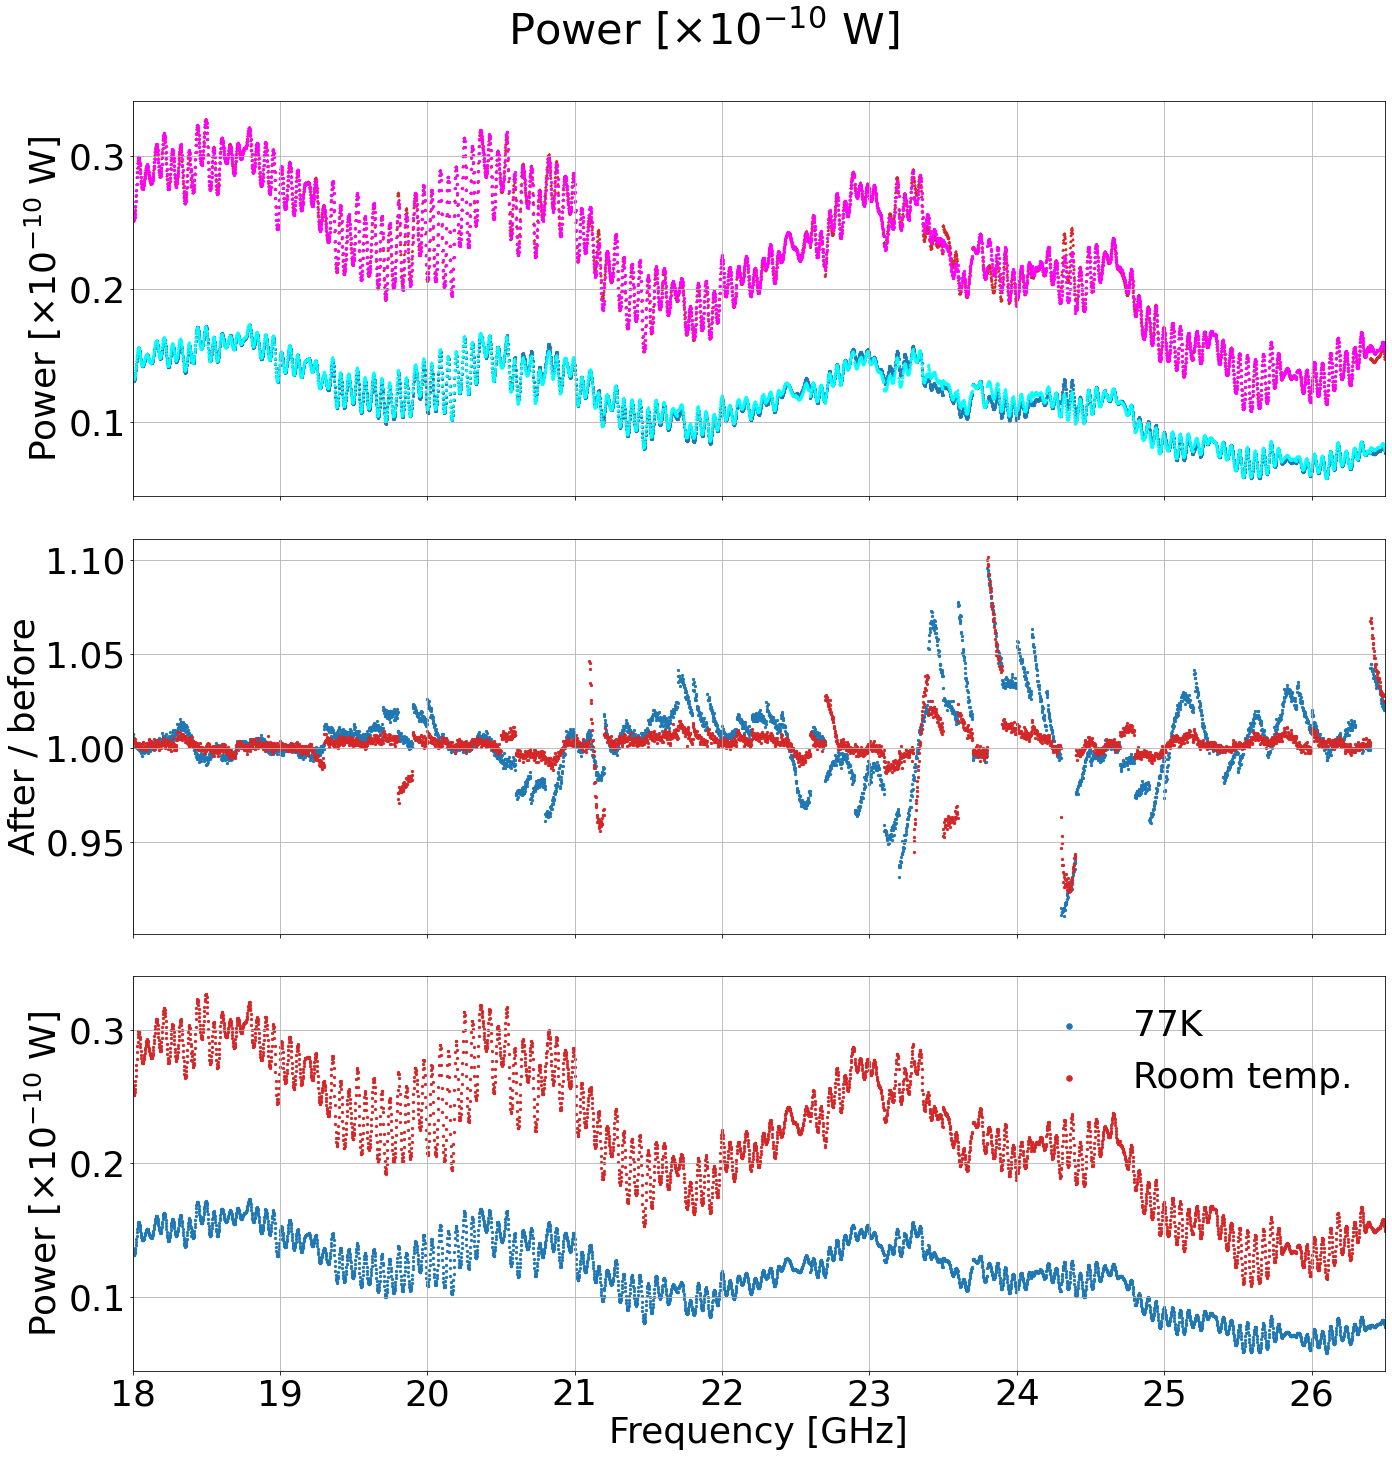

In [33]:
Wconv=1e+10 # W --> aW
ylabel = r"Power [$\times 10^{-10}$ W]"

plt.rcParams["font.size"] = 36
fig, axes = plt.subplots(3,1,figsize=(20,21), squeeze=False, sharex=True)
plt.suptitle(ylabel)

P77_ave = (data['P77_ini']+data['P77_fin'])/2.
P300_ave = (data['P300_ini']+data['P300_fin'])/2.

ax = axes[0][0]
ax.scatter(data["freq"], data["P77_ini"]*Wconv, s=5, color="tab:blue", ls='-', label="77K before")
ax.scatter(data["freq"], data["P77_fin"]*Wconv, s=5, color="cyan", ls='--', label="77K after")
ax.scatter(data["freq"], data["P300_ini"]*Wconv, s=5, color="tab:red", ls='--', label="300K before")
ax.scatter(data["freq"], data["P300_fin"]*Wconv, s=5, color="magenta", ls='-', label="300K after")
ax.set_ylabel(ylabel)
ax.grid()
ax.set_xlim([18,26.5])
#ax.set_ylim([50,70])
#ax.set_yticks([50, 55, 60, 65, 70])

ax = axes[1][0]
ax.scatter(data["freq"], data["P77_fin"]/data["P77_ini"], s=5, color="tab:blue", ls='-', label="77K after/before")
ax.scatter(data["freq"], data["P300_fin"]/data["P300_ini"], s=5, color="tab:red", ls='-', label="300K after/before")
ax.set_ylabel("After / before")
ax.grid()
ax.set_xlim([18,26.5])
#ax.set_ylim([50,70])
#ax.set_yticks([50, 55, 60, 65, 70])

ax = axes[2][0]
ax.scatter(data["freq"], P77_ave*Wconv, s=5, color="tab:blue", ls='-', label="77K")
ax.scatter(data["freq"], P300_ave*Wconv, s=5, color="tab:red", ls='-', label="Room temp.")
ax.set_xlim([18,26.5])
ax.set_ylabel(ylabel)
leg = ax.legend(frameon=False)
for leha in leg.legendHandles:
    leha.set_sizes([30])
    pass
ax.grid()

ax.set_xlabel("Frequency [GHz]")
fig.set_tight_layout(True)
plt.show()
#plt.savefig(f"{outdir}/power.pdf")

# Power 77K & 300K (averaged bins)

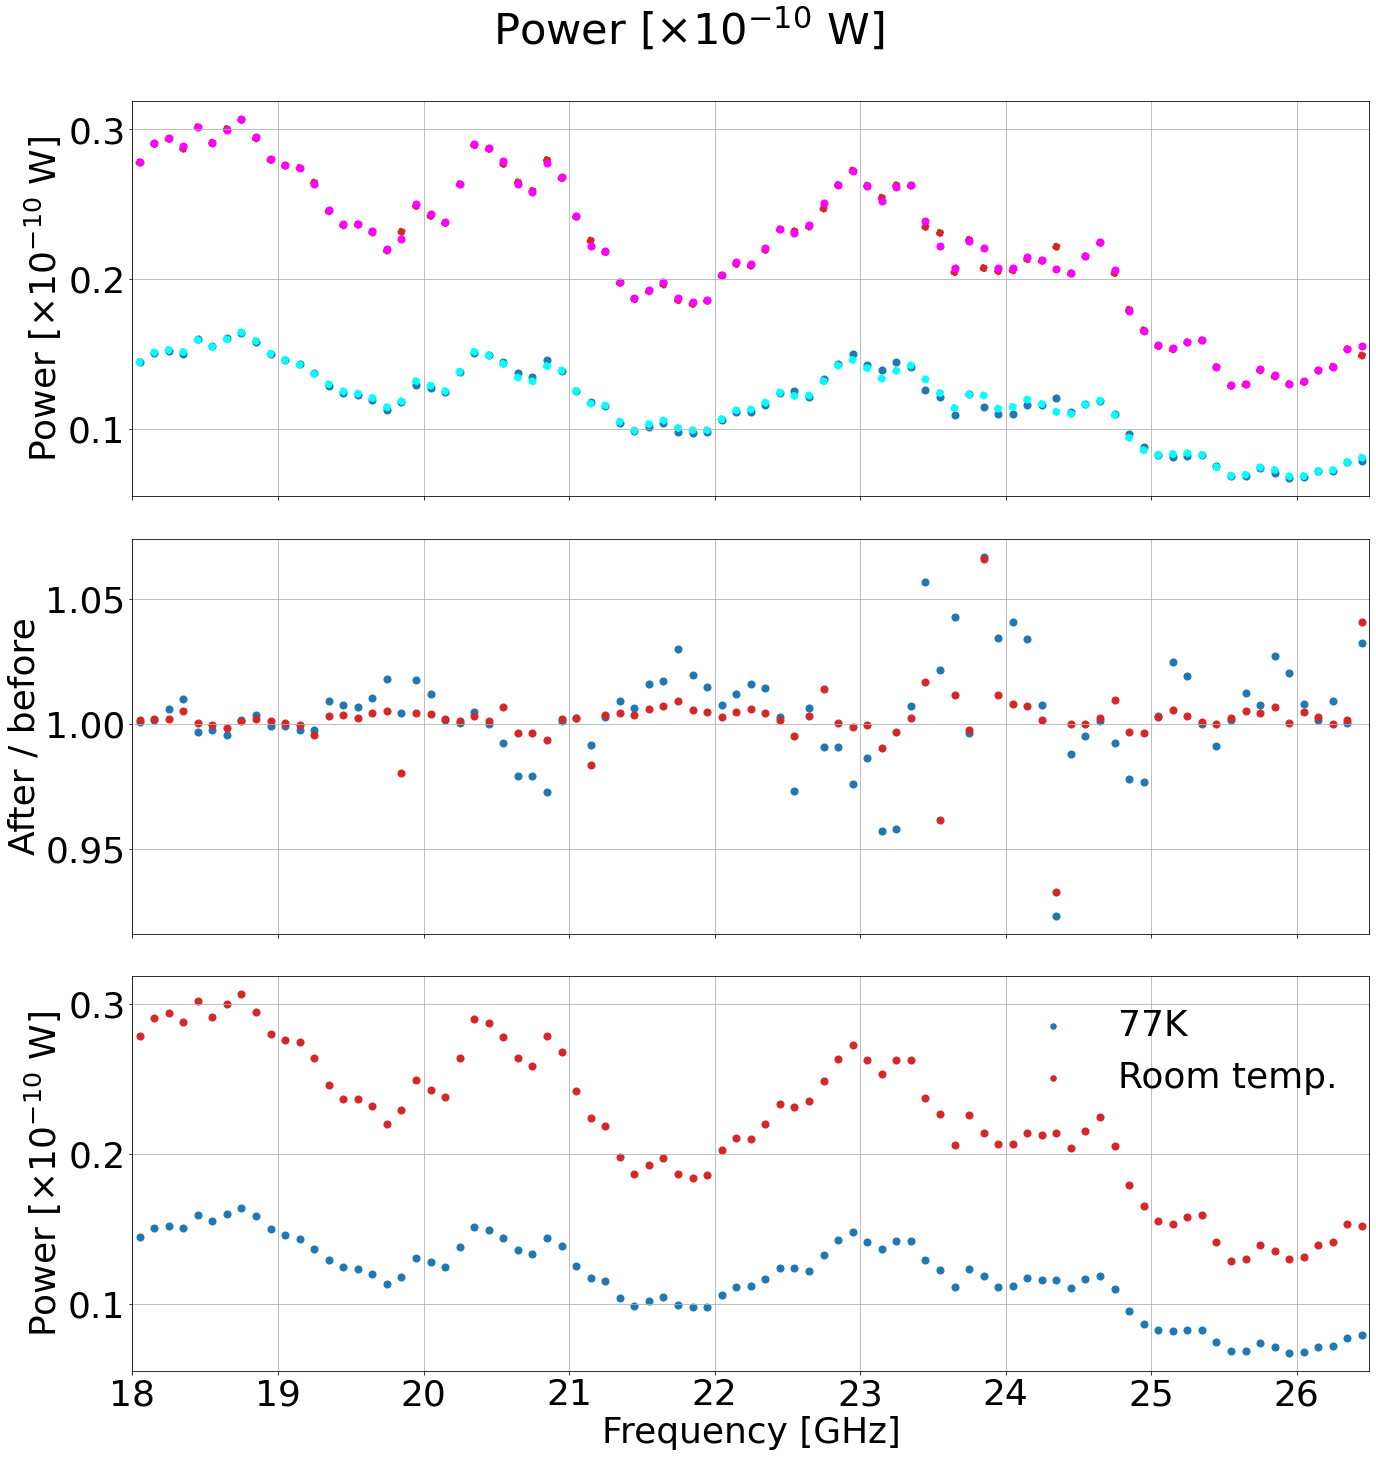

In [36]:
# Rebin
rebin = 50
def average(x, rebin=rebin):
    nbin = (int)(x.size/rebin)
    x_ave = x[:nbin*rebin]
    x_ave = x_ave.reshape(nbin, rebin)
    return np.average(x_ave, axis=1), np.std(x_ave, axis=1)
freq_ave, tmp = average(data['freq'])
P77_ini_ave, tmp = average(data['P77_ini'])
P77_fin_ave, tmp = average(data['P77_fin'])
P300_ini_ave, tmp = average(data['P300_ini'])
P300_fin_ave, tmp = average(data['P300_fin'])
P77_ave = (P77_ini_ave+P77_fin_ave)/2.
P300_ave = (P300_ini_ave+P300_fin_ave)/2.

msize=50
plt.rcParams["font.size"] = 36
fig, axes = plt.subplots(3,1,figsize=(20,21), squeeze=False, sharex=True)
plt.suptitle(ylabel)

ax = axes[0][0]
ax.scatter(freq_ave, P77_ini_ave*Wconv, s=msize, color="tab:blue", ls='-', label="77K before")
ax.scatter(freq_ave, P77_fin_ave*Wconv, s=msize, color="cyan", ls='--', label="77K after")
ax.scatter(freq_ave, P300_ini_ave*Wconv, s=msize, color="tab:red", ls='--', label="300K before")
ax.scatter(freq_ave, P300_fin_ave*Wconv, s=msize, color="magenta", ls='-', label="300K after")
ax.set_ylabel(ylabel)
ax.grid()
ax.set_xlim([18,26.5])
#ax.set_ylim([50,70])
#ax.set_yticks([50, 55, 60, 65, 70])

ax = axes[1][0]
ax.scatter(freq_ave, P77_fin_ave/P77_ini_ave, s=msize, color="tab:blue", ls='-', label="77K after/before")
ax.scatter(freq_ave, P300_fin_ave/P300_ini_ave, s=msize, color="tab:red", ls='-', label="300K after/before")
ax.set_ylabel("After / before")
ax.grid()
ax.set_xlim([18,26.5])
#ax.set_ylim([50,70])
#ax.set_yticks([50, 55, 60, 65, 70])

ax = axes[2][0]
ax.scatter(freq_ave, P77_ave*Wconv, s=msize, color="tab:blue", ls='-', label="77K")
ax.scatter(freq_ave, P300_ave*Wconv, s=msize, color="tab:red", ls='-', label="Room temp.")
ax.set_xlim([18,26.5])
ax.set_ylabel(ylabel)
leg = ax.legend(frameon=False)
for leha in leg.legendHandles:
    leha.set_sizes([30])
    pass
ax.grid()

ax.set_xlabel("Frequency [GHz]")
fig.set_tight_layout(True)
plt.show()
#plt.savefig(f"{outdir}/power_averaged.pdf")

# Gain & Trx

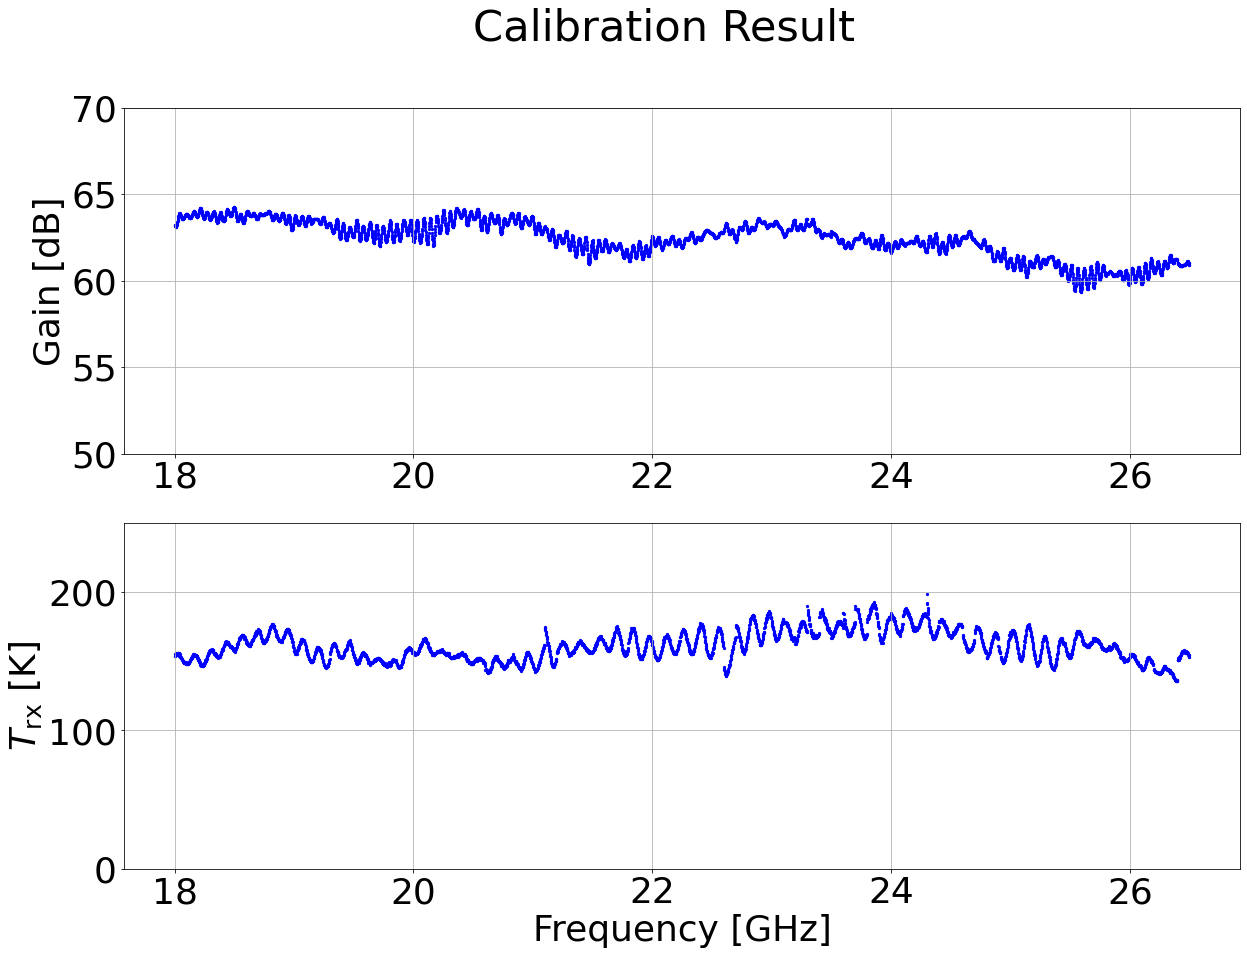

In [11]:
plt.rcParams["font.size"] = 36
fig, axes = plt.subplots(2,1,figsize=(20,14), squeeze=False, sharex=False)
plt.suptitle("Calibration Result")


ax = axes[0][0]
ax.scatter(data["freq"], 10*np.log10(data["Gain"]), s=5, color="blue", label="null sample")
if data2 is not None: ax.scatter(data2["freq"], 10*np.log10(data2["Gain"]), s=5, color="red", label="null sample")
ax.set_ylabel("Gain [dB]")
ax.grid()
ax.set_ylim([50,70])
ax.set_yticks([50, 55, 60, 65, 70])

ax = axes[1][0]
ax.scatter(data["freq"], data["Trx"], s=5, color="blue", label="null sample")
if data2 is not None: ax.scatter(data2["freq"], data2["Trx"], s=5, color="red", label="null sample")
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel(r"$T_{\rm rx}$ [K]")
ax.set_ylim([0,250])
ax.grid()

#plt.savefig(f"{outdir}/gain_Trx.pdf")

# Gain & Trx (averaged bins)

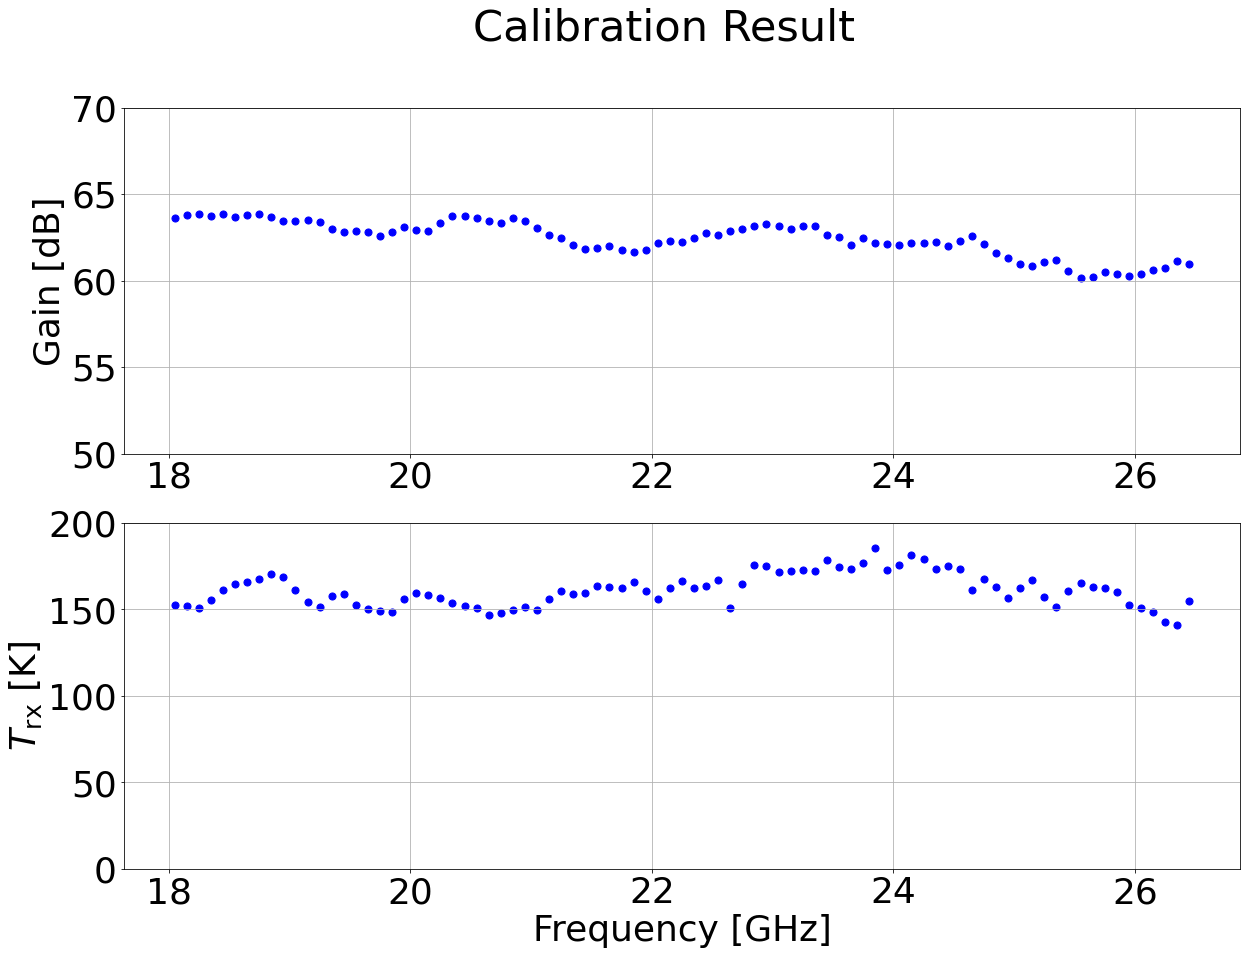

In [7]:
plt.rcParams["font.size"] = 36
fig, axes = plt.subplots(2,1,figsize=(20,14), squeeze=False, sharex=False)
plt.suptitle("Calibration Result")

x = data['freq']
g = data['Gain']
T = data['Trx']

rebin = 50
def average(x, rebin=rebin):
    nbin = (int)(x.size/rebin)
    x_ave = x[:nbin*rebin]
    x_ave = x_ave.reshape(nbin, rebin)
    return np.average(x_ave, axis=1), np.std(x_ave, axis=1)
x_ave, tmp = average(x)
g_ave, tmp = average(g)
T_ave, tmp = average(T)

msize=50
ax = axes[0][0]
ax.scatter(x_ave, 10*np.log10(g_ave), s=msize, color="blue", label="null sample")
ax.set_ylabel("Gain [dB]")
ax.grid()
ax.set_ylim([50,70])
ax.set_yticks([50, 55, 60, 65, 70])

ax = axes[1][0]
ax.scatter(x_ave, T_ave, s=msize, color="blue", label="null sample")
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel(r"$T_{\rm rx}$ [K]")
ax.set_ylim([0,200])
ax.set_yticks([0, 50, 100, 150, 200])
ax.grid()

plt.savefig(f"{outdir}/gain_Trx_ave{rebin}.pdf")

# Gain fluctuation

(4250,) 1800231.5224882152
(4250,) 223715.55436062263
0.7943709326334937
1576515.968127593
361911.98163524084


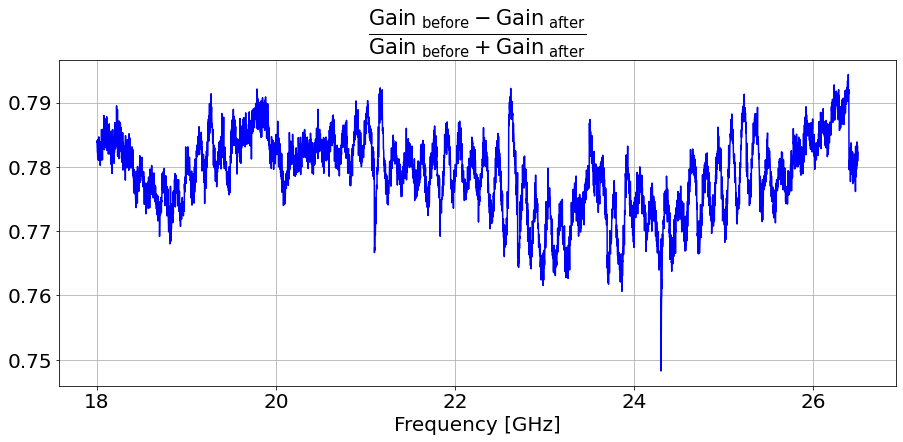

In [8]:
plt.rcParams["font.size"] = 20
plt.figure(figsize=(15,6))
print(y['Gain_ini'].shape, np.mean(y['Gain_ini']))
print(y['Gain_fin'].shape, np.mean(y['Gain_fin']))
ratio = (y["Gain_ini"]-y["Gain_fin"])/(y["Gain_ini"]+y["Gain_fin"])
plt.plot(y["freq"], ratio, color="blue")
#plt.plot(y["freq"], y["Gain_ini"]-y["Gain_fin"], color="blue")
plt.title(r"$\rm \frac{Gain_{~before}-Gain_{~after}}{Gain_{~before}+Gain_{~after}}$", fontsize=30)
plt.ylabel("")
plt.xlabel("Frequency [GHz]")
#plt.yscale("log")
plt.grid()
print(np.max(ratio))
#plt.ylim([-0.15, 0.15])
print(np.mean(y["Gain_ini"]-y["Gain_fin"]))
print(np.std(y["Gain_ini"]-y["Gain_fin"]))

#plt.savefig(f"{outdir}/gain_diffratio_before_after.pdf")

## Trx FFT 

[17.99975 18.00175 18.00375 ... 26.49375 26.49575 26.49775] [2081966.3549957  2064901.5925395  2044204.3840019  ... 1268470.84796092
 1244884.93634138 1234323.36179327]
0.0020000000000000005
freq size = 4250


Text(0.5, 0, 'Frequency repeat period [GHz]')

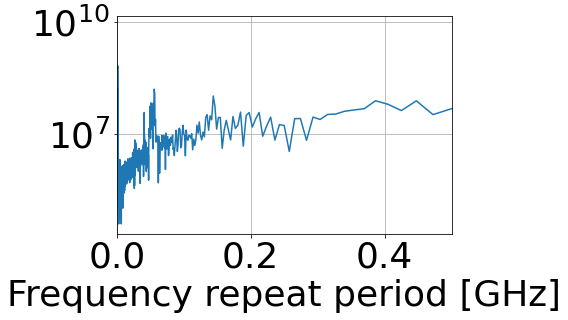

In [100]:
_freq = y['freq']
_gain = y['Gain']

#cut = np.where(_freq<=26.0)
cut = np.where(_freq<=26.5)
_gain = _gain[cut]
_freq = _freq[cut]
print(_freq, _gain)

diff_freq = np.diff(_freq)
diff_freq0 = np.mean(diff_freq)
N = _freq.size
print(diff_freq0)
print(f'freq size = {N}')

fft_gain = np.fft.fft(_gain)
fft_amp = np.abs(fft_gain)
#fft_x = np.linspace(0, 1.0/diff_freq0, N)
#fft_x = np.linspace(0, N-1, N)
fft_x = np.array( [ N*diff_freq0/i for i in range(1, N+1) ] )
plt.plot(fft_x, fft_amp)
plt.yscale('log')
plt.xlim(0.0,0.5)
plt.grid(True)
plt.xlabel('Frequency repeat period [GHz]')

In [101]:
fft_max = np.max(fft_amp[np.where( (fft_x<0.5) & (fft_x>0.1))])
fft_max_index = np.where(fft_amp == fft_max)[0][0]
print(fft_max_index)
freq_max = fft_x[fft_max_index]
print(f'freq period = {freq_max*1e+3} MHz')
c = 3e+8 # m/s
v = c/(freq_max*1e+9)
print(f'v = {v} m')
print(f'v/2 = {v/2} m')
# horn と metal plate の距離は  1.0865 m
l = 1.0865
freq_l = c/l
print(f'freq_l = {freq_l*1e-6} MHz')
print(f'freq_l/2 = {freq_l*1e-6/2} MHz')

58
freq period = 144.06779661016952 MHz
v = 2.08235294117647 m
v/2 = 1.041176470588235 m
freq_l = 276.11596870685685 MHz
freq_l/2 = 138.05798435342842 MHz


## Trx FFT 

[17.99975 18.00175 18.00375 ... 26.49375 26.49575 26.49775] [156.67054538 157.08787288 158.04330767 ... 151.31511428 153.06671701
 151.39019823]
0.0020000000000000005
freq size = 4250


Text(0.5, 0, 'Frequency repeat period [GHz]')

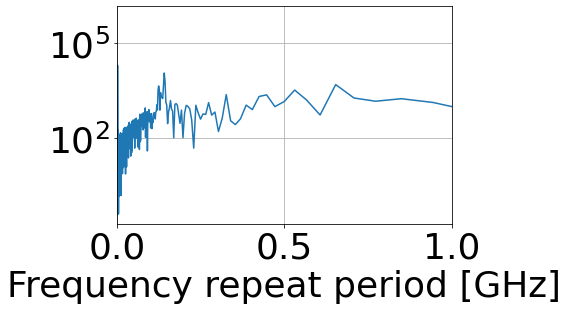

In [85]:
_freq = y['freq']
_Trx = y['Trx']

#cut = np.where(_freq<=26.0)
cut = np.where(_freq<=26.5)
_Trx = _Trx[cut]
_freq = _freq[cut]
print(_freq, _Trx)

diff_freq = np.diff(_freq)
diff_freq0 = np.mean(diff_freq)
N = _freq.size
print(diff_freq0)
print(f'freq size = {N}')

fft_Trx = np.fft.fft(_Trx)
fft_amp = np.abs(fft_Trx)
#fft_x = np.linspace(0, 1.0/diff_freq0, N)
#fft_x = np.linspace(0, N-1, N)
fft_x = np.array( [ N*diff_freq0/i for i in range(1, N+1) ] )
plt.plot(fft_x, fft_amp)
plt.yscale('log')
plt.xlim(0.,1.0)
plt.grid(True)
plt.xlabel('Frequency repeat period [GHz]')

In [96]:
fft_max = np.max(fft_amp[np.where( (fft_x<1.0) & (fft_x>0.1))])
fft_max_index = np.where(fft_amp == fft_max)[0][0]
print(fft_max_index)
freq_max = fft_x[fft_max_index]
print(f'freq period = {freq_max*1e+3} MHz')
c = 3e+8 # m/s
v = c/(freq_max*1e+9)
print(f'v(140MHz) = {c/140e+6} m')
print(f'v = {v} m')
print(f'v/2 = {v/2} m')
# horn と metal plate の距離は  1.0865 m
l = 1.0865
freq_l = c/l
print(f'freq_l = {freq_l*1e-6} MHz')
print(f'freq_l/2 = {freq_l*1e-6/2} MHz')

59
freq period = 141.66666666666669 MHz
v = 2.117647058823529 m
v/2 = 1.0588235294117645 m
freq_l = 276.11596870685685 MHz
freq_l/2 = 138.05798435342842 MHz


# Calculate NET

上で計算される $T_{\mathrm{rx}}$ は $\eta_{\mathrm{win}}$ (黒体=窓を見込む beam の割合) で大きく評価されている

今回のクライオスタット込みで Y-factor 測定した場合は
$$
\begin{align}
    G & \equiv \frac{ G^\mathrm{real} \eta_\mathrm{win} }{2}  &[\mbox{小高修論 (5.5)}] \\
    P_\mathrm{out} &= G k_\mathrm{B} ( T_\mathrm{BB} + T_\mathrm{rx} )\Delta \nu  &[\mbox{小高修論 (5.10)}] \\
    P_{\mathrm{out}} &= \frac{ G^\mathrm{real}\eta_\mathrm{win} }{2} k_\mathrm{B} (T_\mathrm{BB} + T_\mathrm{rx} )\Delta \nu &(1)\\
\end{align}
$$
という式で定義される $G$, $T_\mathrm{rx}$ を求めている。

注) さらに、fit する $P_\mathrm{in}$ は
$$
\begin{align}
    P_\mathrm{in} &= \frac{ P_\mathrm{out} }{G} - k_\mathrm{B}T_\mathrm{rx}\Delta\nu \\
                  &= \frac{ P_\mathrm{out} }{G^\mathrm{real} \eta_\mathrm{win} /2 } - k_\mathrm{B}T_\mathrm{rx}\Delta\nu
\end{align}
$$
を用いている。(本来の $P_\mathrm{DP}$ には $\eta_\mathrm{win}$ は寄与しないので、$P_\mathrm{in}\eta_\mathrm{win}$ が実際に推定される $P_\mathrm{DP}$ になる。)


実際の $T^\mathrm{real}_\mathrm{rx}$ は受信機の内部雑音であり、$\eta_\mathrm{win}$ がかからないはずなので,
$$
    P_{\mathrm{out}} = \frac{ G^\mathrm{real} }{2} k_\mathrm{B} (\eta_\mathrm{win}T_\mathrm{BB} + T_\mathrm{rx}^\mathrm{real} )\Delta \nu  \qquad (2)
$$
とかけるべきである。
(入射する黒体輻射には $\eta_\mathrm{win}$ がかかる。)

式(1), (2)を比較すると
$$
    T_\mathrm{rx}^\mathrm{real} = \eta_\mathrm{win}T_\mathrm{rx}
$$

また、$T_\mathrm{load}$ (入射熱放射) については、
$$
\begin{align}
    P_{\mathrm{out, search}} &= \frac{ G^\mathrm{real} }{2} k_\mathrm{B} (\eta_\mathrm{win}T_\mathrm{load} + T_\mathrm{rx}^\mathrm{real} )\Delta \nu  \qquad \\
                     &= G k_\mathrm{B} (T_\mathrm{load} + T_\mathrm{rx} )\Delta \nu \qquad (\mbox{式(5.5) より})\\
    T_{\mathrm{load}} &= \frac{ P_{\mathrm{out, search}} }{G k_\mathrm{B}\Delta\nu} - T_\mathrm{rx}
\end{align}
$$
となり、$P_\mathrm{out, search}$ (探索するセットアップでの出力) から上で求めた $G, T_\mathrm{rx}$ (real の方ではない) を用いて計算できる

$T_\mathrm{sys}$ は
$$
    T_\mathrm{sys} = T_\mathrm{load} + T_\mathrm{rx}^\mathrm{rx} = T_\mathrm{load} + \eta_\mathrm{win} T_\mathrm{rm}
$$

$\mathrm{NEP}$ は, $P_{noise} = k_B T_{sys} \Delta \nu$ と雑音パワーを書けるので
$$
\begin{align}
 \mathrm{NEP} &= \sqrt{2 P_{noise} k_B T_{sys}} \\
     &= \sqrt{2\Delta\nu} k_B T_{sys} \\
     &= \sqrt{2\Delta\nu} k_B (T_{load} + \eta_\mathrm{win} T_{rx})
\end{align}
$$
注) $\sqrt{2}$ は $\mathrm{NEP}$ が 0.5 sec の時間積分でのノイズを表しているため。

In [3]:
## eta_win 
# Function of eta_window
# Obtained from Aeff_analysis.ipynb
# function(nu) = a(nu[GHz]-22 GHz) + b
# a = 0.017279 +/- 0.00018
# b = 0.238357 +/- 0.000465
def eta_win(freq, a=0.017279, b=0.238357):
    return a * (freq - 22.) + b

In [4]:
# Parameters
rbw = 300. # frequencyc Resolution Band Width (RBW) [Hz]
bin_width = 2e+3 # bin width in analysis
peak_width = 20e+3 # signal peak width
from scipy import constants
k_B, _unit_k_B, _uncertainty = constants.physical_constants['Boltzmann constant']
print(f'{k_B} [{_unit_k_B}]')

1.380649e-23 [J K^-1]


dict_keys(['freq', 'W'])
freqs (size:111413750) = [18.00000002 18.00000009 18.00000017 ... 26.49999983 26.49999991
 26.49999998]
Pout (size:111413750) = [1.85033549e-12 1.86950361e-12 1.88626766e-12 ... 1.30718744e-12
 1.31516017e-12 1.31641159e-12]


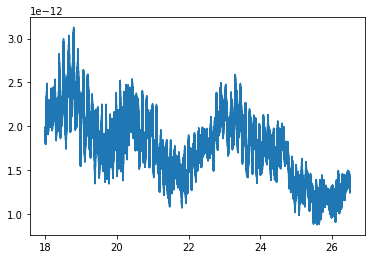

In [5]:
## Get P_out
data = func.csv_to_array("/data/ms2840a/result_data/signal_raw_data.csv")

print(data.keys())

freqs_Pout = data['freq'] # GHz
Pout = data['W']
print(f'freqs (size:{len(freqs_Pout)}) = {freqs_Pout}')
print(f'Pout (size:{len(Pout)}) = {Pout}')
plt.plot(freqs_Pout, Pout)

In [6]:
# raw binning --> 2kHz rbw
freq_rebin, Pout_rebin, tmp = func.rebin_func_consider_rbw(freqs_Pout, Pout, method=1)

In [16]:
'''
n_mean = 10000
resize = int(len(freqs_Pout)/n_mean)
print(f'original size = {len(freqs_Pout)}')
print(f'n_mean = {n_mean}')
print(f'resize = {resize}')
# Mean in each n_mean length
_freqs_Pout = np.reshape( freqs_Pout[:resize*n_mean], (resize, n_mean) )
print(f'_freqs_Pout ({_freqs_Pout.shape}) = {_freqs_Pout}')
freqs_Pout_mean = np.average(_freqs_Pout, axis=1)
print(f'freqs_Pout_mean (size:{len(freqs_Pout_mean)}) = {freqs_Pout_mean}')
_Pout = np.reshape( Pout[:resize*n_mean], (resize, n_mean) )
print(f'_Pout ({_Pout.shape}) = {_Pout}')
Pout_mean = np.average(_Pout, axis=1)
Pout_std = np.std(_Pout, axis=1)
print(f'Pout_mean (size:{len(Pout_mean)}) = {Pout_mean}')
plt.plot(freqs_Pout_mean, Pout_mean)
plt.plot(freqs_Pout_mean, Pout_std)
'''
_freqs_Pout = freq_rebin
Pout_mean = Pout_rebin
print(Pout_rebin)
print(f'{Pout.shape[0]*76:.2e}')

[1.16798653e-11]
8.47e+09


In [30]:
# Get y value at x from y_array with different x_array
def get_betweenY(x, x_array, y_array):
    x_diff = x_array - x
    #x_diff_min = np.min(np.abs(x_diff))
    #min_index = np.where(abs(x_diff) == x_diff_min)[0]
    min_index = np.abs(x_diff).argmin()
    x_min = x_array[min_index]
    y_min = y_array[min_index]
    min2_index = min_index + 1 if x - x_min > 0. else min_index - 1 # Get next index
    x_min2 = x_array[min2_index]
    y_min2 = y_array[min2_index]
    return ( y_min*(x - x_min2) + y_min2*(x_min - x) ) / (x_min - x_min2)

In [31]:
# Get gain, Trx
freqs = y['freq'] # GHz
print(f'freqs (size:{len(freqs)}) = {freqs}')
gains = y["Gain"]
Trx = y['Trx']

freqs (size:4250) = [17.99975 18.00175 18.00375 ... 26.49375 26.49575 26.49775]


In [165]:
# Get Pout at freqs (Takes a time)
Pout2 = []
for i, _freq in enumerate(freqs):
    if i%100 == 0: print(f'i = {i}/{len(freqs)}')
    _Pout = get_betweenY(_freq, freqs_Pout_mean, Pout_mean)
    Pout2.append(_Pout)
    pass
Pout2 = np.array(Pout2)

i = 0/4250
i = 100/4250
i = 200/4250
i = 300/4250
i = 400/4250
i = 500/4250
i = 600/4250
i = 700/4250
i = 800/4250
i = 900/4250
i = 1000/4250
i = 1100/4250
i = 1200/4250
i = 1300/4250
i = 1400/4250
i = 1500/4250
i = 1600/4250
i = 1700/4250
i = 1800/4250
i = 1900/4250
i = 2000/4250
i = 2100/4250
i = 2200/4250
i = 2300/4250
i = 2400/4250
i = 2500/4250
i = 2600/4250
i = 2700/4250
i = 2800/4250
i = 2900/4250
i = 3000/4250
i = 3100/4250
i = 3200/4250
i = 3300/4250
i = 3400/4250
i = 3500/4250
i = 3600/4250
i = 3700/4250
i = 3800/4250
i = 3900/4250
i = 4000/4250
i = 4100/4250
i = 4200/4250


In [39]:
Prx = Trx*k_B*rbw
Pin = Pout2/(gains) - Prx
Tload = Pout2/(gains*k_B*rbw) - Trx
Trx_real = Trx * eta_win(freqs)
Tload_real =  Tload * eta_win(freqs)
Tsys_real = Tload_real + Trx_real
#NEP = np.sqrt(2.*rbw)*k_B*Tsys
NEP_peakw = np.sqrt(2.*peak_width)*k_B*Tsys_real
NEP_rbw = np.sqrt(2.*rbw)*k_B*Tsys_real

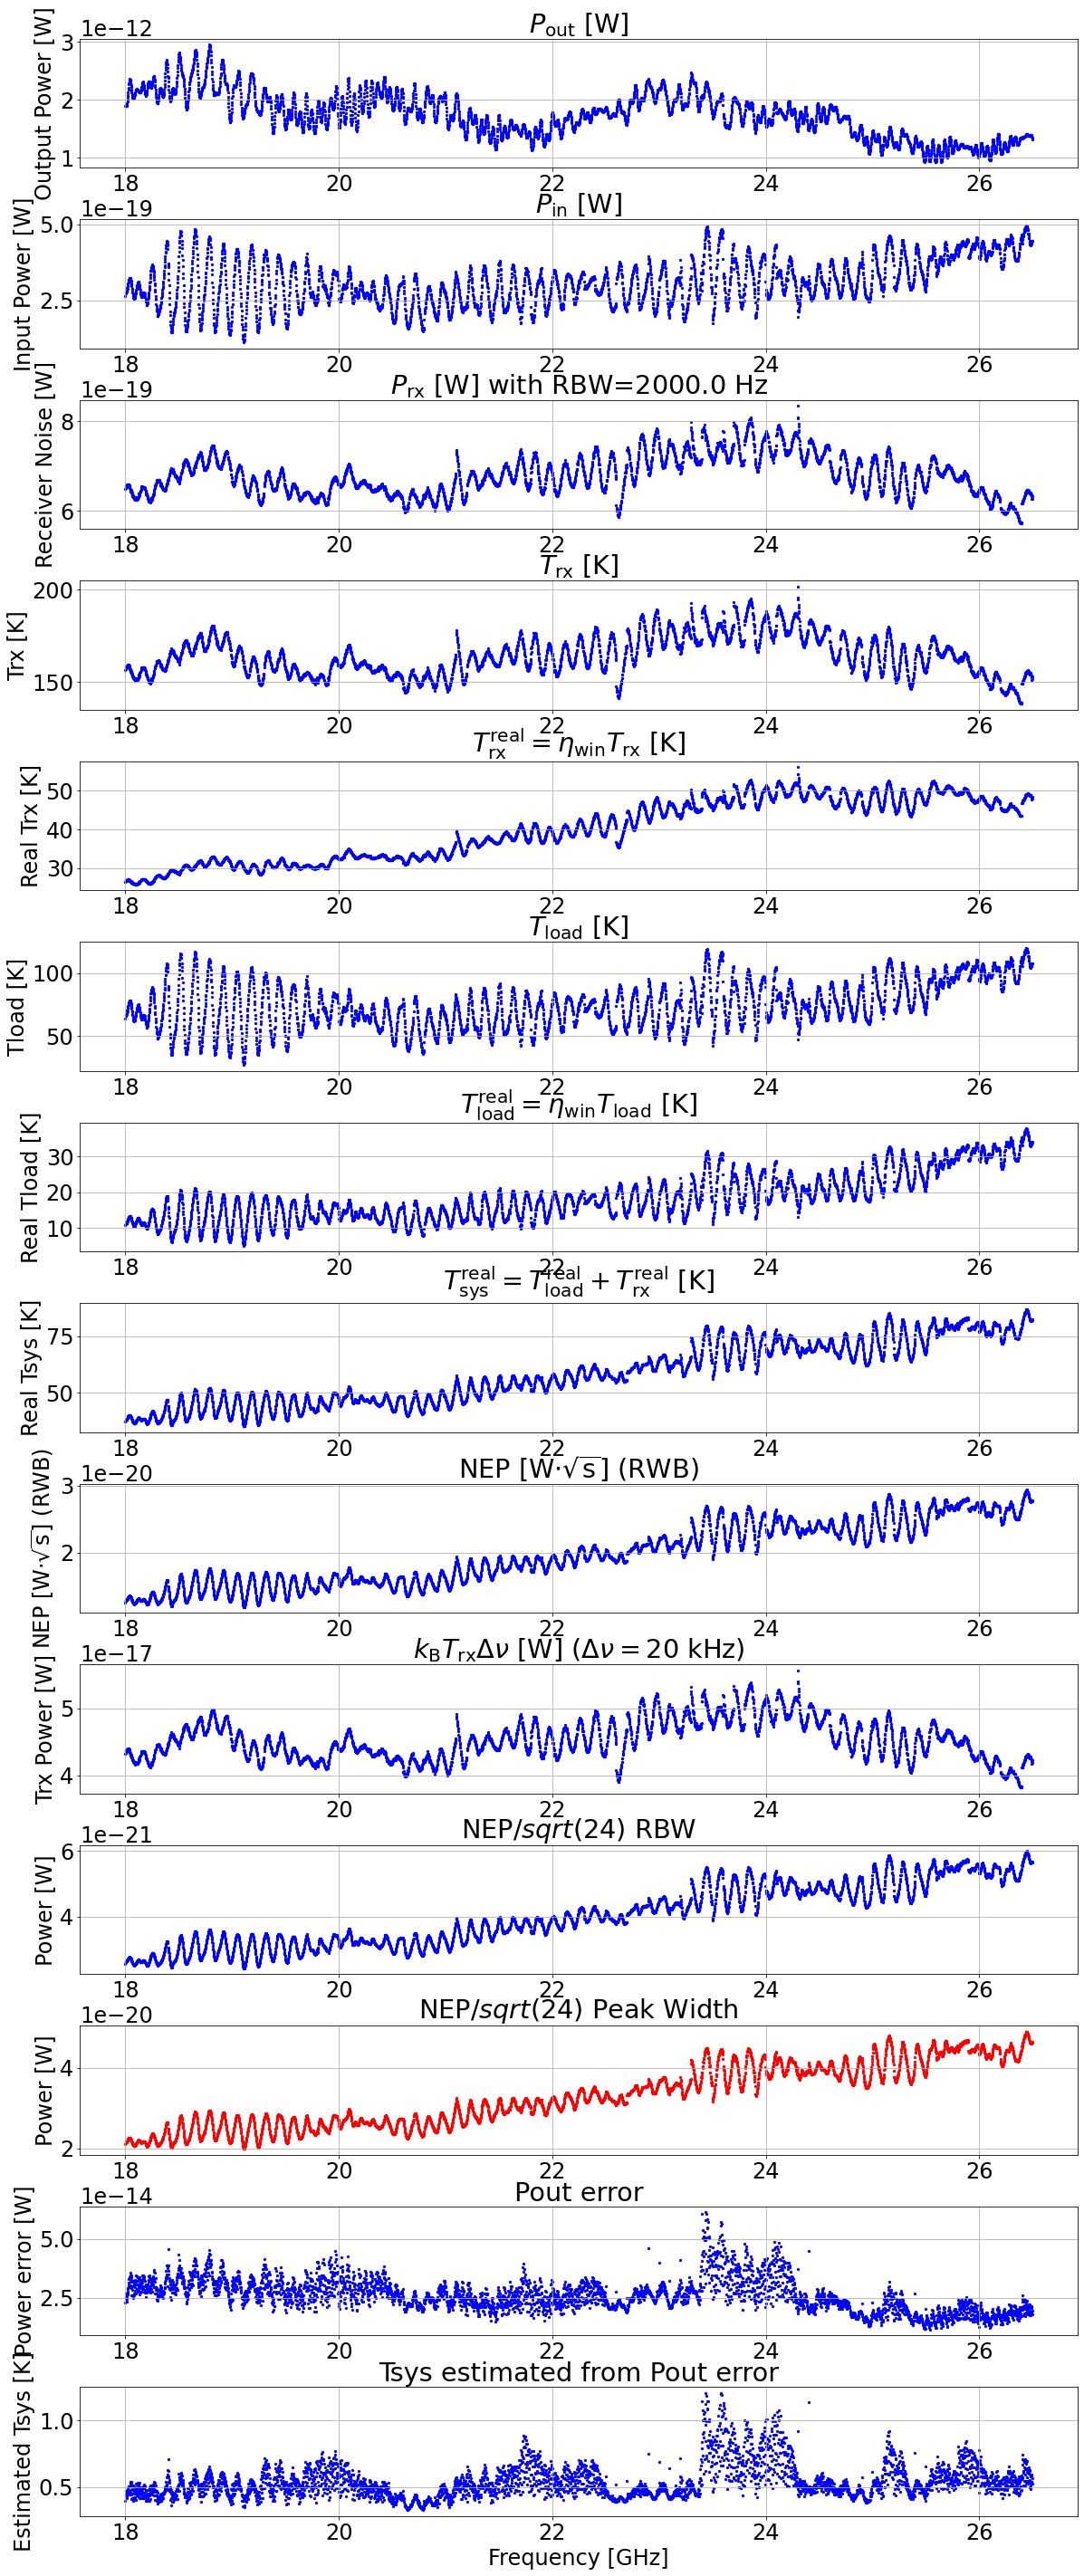

In [168]:
# Plot
plt.rcParams["font.size"] = 24
fig, axes = plt.subplots(14,1,figsize=(18,40), squeeze=False, sharex=False)
fig.tight_layout()

ax = axes[0][0]
ax.scatter(freqs, Pout2, s=5, color="blue", label="$P_{\mathrm{out}}$")
ax.set_ylabel("Output Power [W]")
ax.set_title(r"$P_{\rm{out}}$ [W]")
ax.grid()

ax = axes[1][0]
ax.scatter(freqs, Pin, s=5, color="blue", label="$P_{\mathrm{in}}$")
ax.set_ylabel("Input Power [W]")
ax.set_title(r"$P_{\rm{in}}$ [W]")
ax.grid()

ax = axes[2][0]
ax.scatter(freqs, Prx, s=5, color="blue", label=r"$P_{\mathrm{rx}}$"+f" with RBW={rbw} Hz")
ax.set_ylabel("Receiver Noise [W]")
ax.set_title(r"$P_{\rm{rx}}$ [W]"+f" with RBW={rbw} Hz")
ax.grid()

ax = axes[3][0]
ax.scatter(freqs, Trx, s=5, color="blue", label="$T_{\mathrm{rx}}$")
ax.set_ylabel("Trx [K]")
ax.set_title(r"$T_{\rm{rx}}$ [K]")
ax.grid()

ax = axes[4][0]
ax.scatter(freqs, Trx_real, s=5, color="blue", label="$T_{\mathrm{rx}}^{\mathrm{real}$")
ax.set_ylabel("Real Trx [K]")
ax.set_title(r"$T_{\rm{rx}}^{\rm{real}} = \eta_{\rm{win}} T_{\rm{rx}}$ [K]")
ax.grid()

ax = axes[5][0]
ax.scatter(freqs, Tload, s=5, color="blue", label="$T_{\mathrm{load}}$")
ax.set_ylabel("Tload [K]")
ax.set_title(r"$T_{\mathrm{load}}$ [K]")
ax.grid()

ax = axes[6][0]
ax.scatter(freqs, Tload_real, s=5, color="blue", label="$T_{\mathrm{load}}^{\mathrm{real}}$")
ax.set_ylabel("Real Tload [K]")
ax.set_title(r"$T_{\mathrm{load}}^\mathrm{real} = \eta_\mathrm{win} T_\mathrm{load}$ [K]")
ax.grid()

ax = axes[7][0]
ax.scatter(freqs, Tsys_real, s=5, color="blue", label="$T_{\mathrm{sys}}$")
ax.set_ylabel("Real Tsys [K]")
ax.set_title(r"$T_{\mathrm{sys}}^\mathrm{real} = T_{\mathrm{load}}^\mathrm{real} + T_\mathrm{rx}^{\mathrm{real}}$ [K]")
ax.grid()

ax = axes[8][0]
ax.scatter(freqs, NEP_rbw, s=5, color="blue", label="NEP")
ax.set_ylabel(r"NEP [W$\cdot\sqrt{\mathrm{s}}$] (RWB)")
ax.set_title(r"NEP [W$\cdot\sqrt{\mathrm{s}}$] (RWB)")
ax.grid()

ax = axes[9][0]
ax.scatter(freqs, k_B*Trx*20e+3, s=5, color="blue", label=r"$k_{\mathrm{B}} T_{\mathrm{rx}} \Delta \nu$")
ax.set_ylabel("Trx Power [W]")
ax.set_title(r"$k_{\mathrm{B}} T_{\mathrm{rx}} \Delta \nu$ [W] ($\Delta \nu= 20$ kHz)")
ax.grid()

dP_DP_rbw = NEP_rbw/np.sqrt(24.)
ax = axes[10][0]
ax.scatter(freqs, dP_DP_rbw, s=5, color="blue", label=r"$\mathrm{NEP}/sqrt(24)$ RBW")
ax.set_ylabel("Power [W]")
ax.set_title(r"$\mathrm{NEP}/sqrt(24)$ RBW")
ax.grid()

dP_DP_peakw = NEP_peakw/np.sqrt(24.)
ax = axes[11][0]
ax.scatter(freqs, dP_DP_peakw, s=5, color="red", label=r"$\mathrm{NEP}/sqrt(24)$ Peak Width")
ax.set_ylabel("Power [W]")
ax.set_title(r"$\mathrm{NEP}/sqrt(24)$ Peak Width")
ax.grid()

ax = axes[12][0]
ax.scatter(freqs, Pout2_std, s=5, color="blue", label=r"Pout error")
ax.set_ylabel("Power error [W]")
ax.set_title(r"Pout error")
ax.grid()

ax = axes[13][0]
ax.scatter(freqs, Pout2_std/(gains*k_B*rbw), s=5, color="blue", label=r"Estimated Tsys")
ax.set_ylabel("Estimated Tsys [K]")
ax.set_title(r"Tsys estimated from Pout error")
ax.grid()


ax.set_xlabel(r"Frequency [GHz]")

fig.subplots_adjust(hspace=0.4, left=0.10, right=0.95, bottom=0.0, top=0.95)

#fig.savefig(f"{outdir}/RealTrx_Tsys_NEP.pdf")

In [63]:
a = np.linspace(0,100,101)
print(a)
rebin = 10
nbin = (int)(a.size/rebin)
b = a[:nbin*rebin].reshape(nbin,rebin)
print(b)
np.average(b, axis=1)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.]
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
 [50. 51. 52. 53. 54. 55. 56. 57. 58. 59.]
 [60. 61. 62. 63. 64. 65. 66. 67. 68. 69.]
 [70. 71. 72. 73. 74. 75. 76. 77. 78. 79.]
 [80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
 [90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]]


array([ 4.5, 14.5, 24.5, 34.5, 44.5, 54.5, 64.5, 74.5, 84.5, 94.5])

## Gain & Trx for additional data

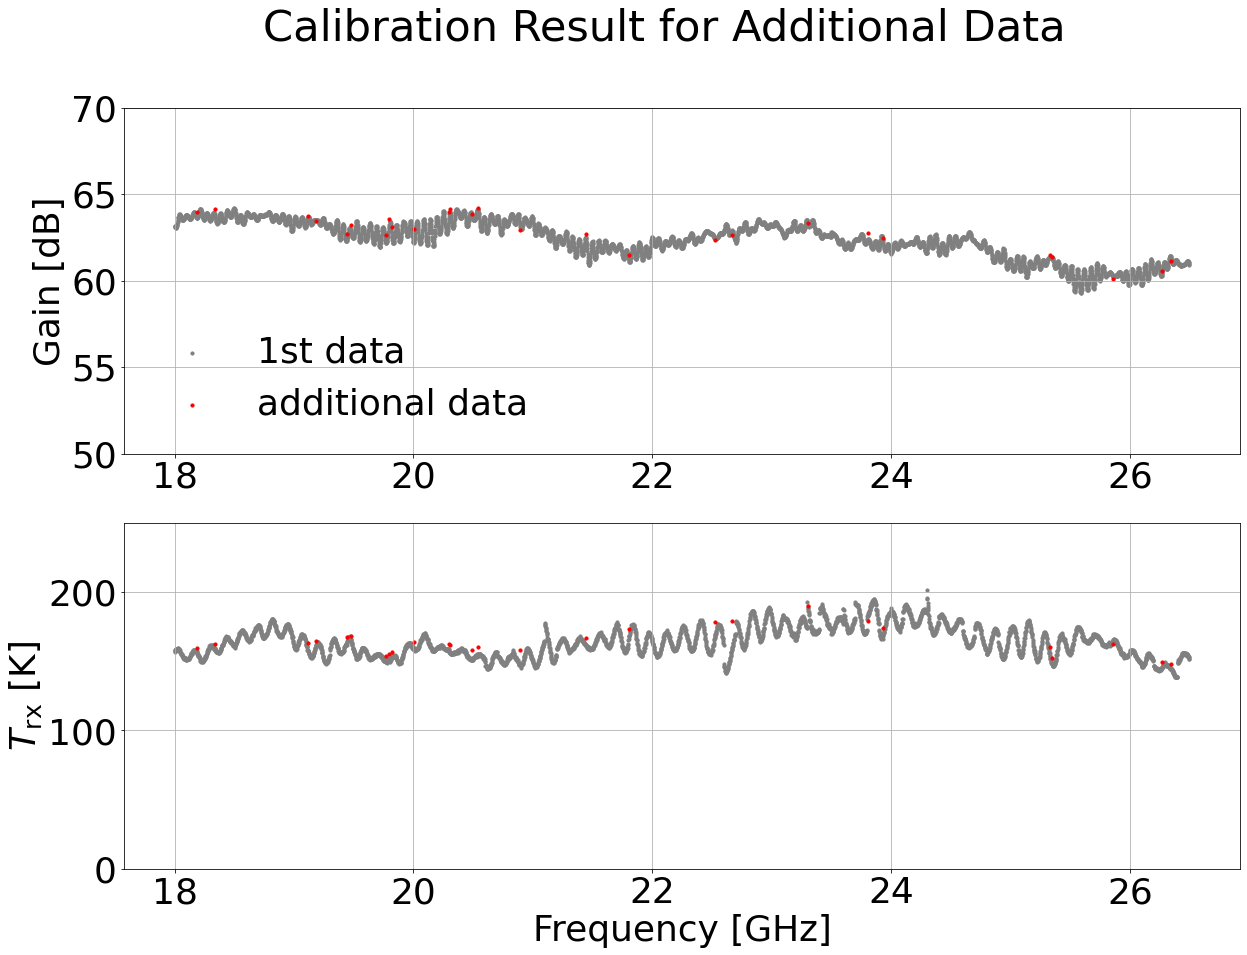

In [30]:
plt.rcParams["font.size"] = 36
fig, axes = plt.subplots(2,1,figsize=(20,14), squeeze=False, sharex=False)
plt.suptitle("Calibration Result for Additional Data")


y_add = func.csv_to_array("/data/ms2840a/result_data/check_result/yfactor_check_result.csv")

ax = axes[0][0]
ax.scatter(y["freq"], 10*np.log10(y["Gain"]), s=10, color="gray", label='1st data')
ax.scatter(y_add["freq"], 10*np.log10(y_add["Gain"]), s=10, color="red", label="additional data")
ax.set_ylabel("Gain [dB]")
ax.grid()
ax.legend(frameon=False)
ax.set_ylim([50,70])
ax.set_yticks([50, 55, 60, 65, 70])

ax = axes[1][0]
ax.scatter(y["freq"], y["Trx"], s=10, color="gray", label='1st data')
ax.scatter(y_add["freq"], y_add["Trx"], s=10, color="red", label='additional data')
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel(r"$T_{\rm rx}$ [K]")
ax.set_ylim([0,250])
ax.grid()

#plt.savefig(f"{outdir}/gain_Trx.pdf")

## Check before and after the additional data @ 23.935 386 GHz (min. p-local)

In [31]:
rbw = 2e+3 # Hz
file_freq = '23.933750'
# Get gain & Trx for this frequency
y_index = np.where(y['freq']*1e+6==float(file_freq)*1e+6)[0][0]
print(y_index)
y_add_index = np.where(y_add['freq']*1e+6==float(file_freq)*1e+6)[0][0]
gain_b = y['Gain'][y_index]
gain_a = y_add['Gain'][y_add_index]
Trx_b = y['Trx'][y_index]
Trx_a = y_add['Trx'][y_add_index]
Prx_b = k_B * Trx_b * rbw
Prx_a = k_B * Trx_a * rbw
print('gain [scale]', gain_b, gain_a, f'ratio = {gain_a/gain_b}')
print('gain [dB]', np.log10(gain_b)*10, np.log10(gain_a)*10)
print('Trx [K]', Trx_b, Trx_a, f'ratio = {Trx_a/Trx_b}')
print('Offset power (k_B*Trx*rbw) [W]', Prx_b, Prx_a, f'ratio = {Prx_a/Prx_b}')

2967
gain [scale] 1675198.8556697026 1757080.57778765 ratio = 1.0488788073373017
gain [dB] 62.240663676678 62.44791678220465
Trx [K] 168.70576826179845 173.6771203090675 ratio = 1.0294675878512611
Offset power (k_B*Trx*rbw) [W] 4.658469004897676e-18 4.795742849551875e-18 ratio = 1.0294675878512611


length: after = 1250, before = 1250


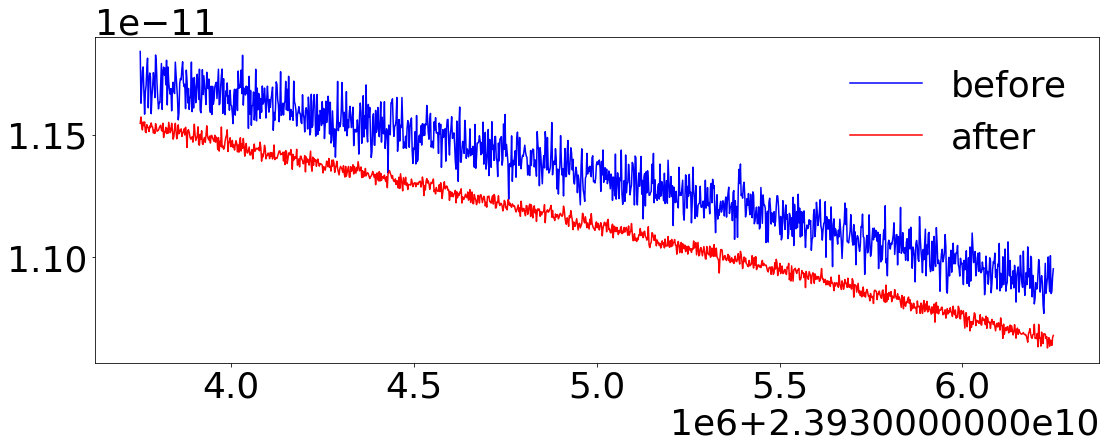

In [32]:
# Plot raw data (before rebinning & only 1 subset data in 12 data)
nRun=12
raw_datafile_before = f'/data/ms2840a/signal_raw_data/scan_FFT_{file_freq}GHz_span2.50MHz_rbw0.3kHz_2.0sec_1counts_12runs_'
raw_datafile_after = f'/data/ms2840a/signal_data_check/2022-01-17/data/scan_FFT_{file_freq}GHz_span2.50MHz_rbw0.3kHz_20.0sec_1counts_12runs_'
doRebin = True

for i in range(nRun):
    _freq_raw_b, _raw_b, _raw_b_err = func.dat_to_array(raw_datafile_before+f'{i}.dat', doRebin=doRebin, rebinmethod=1)
    _freq_raw_a, _raw_a, _raw_a_err = func.dat_to_array(raw_datafile_after+f'{i}.dat', doRebin=doRebin, rebinmethod=1)
    if i == 0:
        freq_raw_b, raw_b = _freq_raw_b, _raw_b
        freq_raw_a, raw_a = _freq_raw_a, _raw_a
        Pin2_b = _raw_b/gain_b - Prx_b
        Pin2_a = _raw_a/gain_a - Prx_a
    else:
        raw_b += _raw_b
        raw_a += _raw_a
        Pin2_b += _raw_b/gain_b - Prx_b
        Pin2_a += _raw_a/gain_a - Prx_a
        pass
    pass
raw_b = raw_b/(float(nRun))
raw_a = raw_a/(float(nRun))
Pin2_b = Pin2_b/(float(nRun))
Pin2_a = Pin2_a/(float(nRun))
print(f'length: after = {len(freq_raw_a)}, before = {len(freq_raw_b)}')

plt.figure(figsize=(18,6))
plt.plot(freq_raw_b, raw_b, c='b', label='before')
plt.plot(freq_raw_a, raw_a, c='r', label='after')
plt.legend(frameon=False)

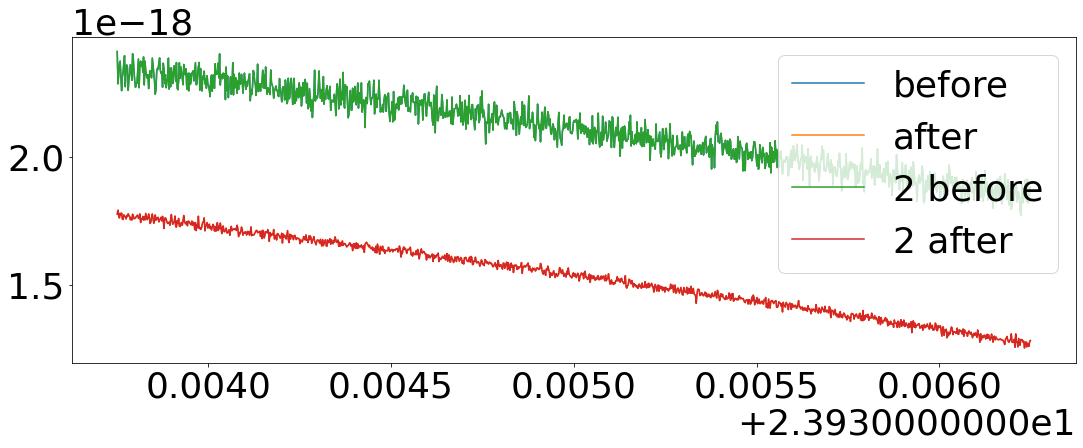

In [33]:
# Calculate P_in
Pin_b = raw_b/gain_b - Prx_b
Pin_a = raw_a/gain_a - Prx_a

plt.figure(figsize=(18,6))
plt.plot(freq_raw_b*1e-9, Pin_b, label='before')
plt.plot(freq_raw_a*1e-9, Pin_a, label='after')
plt.plot(freq_raw_b*1e-9, Pin2_b, label='2 before')
plt.plot(freq_raw_a*1e-9, Pin2_a, label='2 after')
plt.legend()
#print(f'mean: after = {}')
#plt.xlim(23.9353, 23.9355)

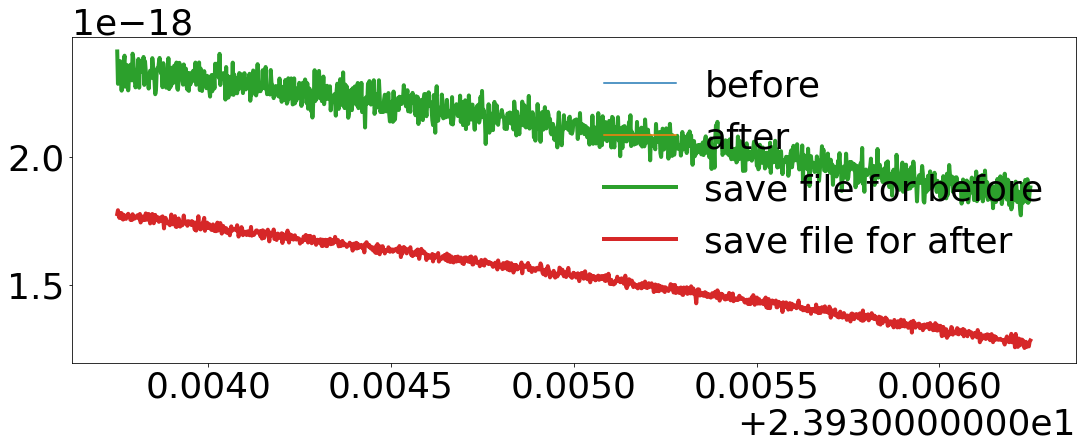

In [34]:
# Plot saved data of P_in
keys_W = [ f'W_{i}' for i in range(nRun) ]

Pin_b_datafile = f"/data/analysis/dosue-k/output/result_data_newrebin2/signal_12_data/start_{file_freq}GHz.csv"
data_b = func.csv_to_array(Pin_b_datafile)
_W_b_array = np.array([ data_b[key] for key in keys_W ])
_W_b = np.average(_W_b_array, axis=0) # mean of (W_0, W_1,... W_{n_data})
freq_W_b, _W_b, _W_b_err = func.rebin_func_consider_rbw(data_b['freq'], _W_b, method=1)

Pin_a_datafile = f"/data/analysis/dosue-k/output/result_data_newrebin2/check_result/signal_12_data/start_{file_freq}GHz.csv"
data_a = func.csv_to_array(Pin_a_datafile)
_W_a_array = np.array([ data_a[key] for key in keys_W ])
_W_a = np.average(_W_a_array, axis=0) # mean of (W_0, W_1,... W_{n_data})
freq_W_a, _W_a, _W_a_err = func.rebin_func_consider_rbw(data_a['freq'], _W_a, method=1)

plt.figure(figsize=(18, 6))
#for i in range(nRun):
#    plt.plot(data['freq'], _W_array[i], lw=0.1)
#    pass
plt.plot(freq_raw_b*1e-9, Pin_b, label='before')
plt.plot(freq_raw_a*1e-9, Pin_a, label='after')
plt.plot(freq_W_b*1e-9, _W_b, label='save file for before', lw=4)
plt.plot(freq_W_a*1e-9, _W_a, label='save file for after', lw=4)
plt.legend(frameon=False)

In [46]:
# Calculate std error
rebin = (int)(250/2)
print(rebin)
Pin_b_ave, Pin_b_std = average(Pin_b, rebin)
print(Pin_b_ave)
print(Pin_b_std)
print(f'{Pin_b_std*np.sqrt(24.)/(np.sqrt(2)*k_B*np.sqrt(2e+3))*0.25} K')

125
[2.31948534e-18 2.27964045e-18 2.22963455e-18 2.18948355e-18
 2.13385020e-18 2.08631031e-18 2.03553314e-18 1.97727041e-18
 1.92392719e-18 1.86765539e-18]
[3.83209649e-20 3.90344485e-20 4.17240011e-20 3.91783396e-20
 3.87346754e-20 3.81904873e-20 3.58889568e-20 3.70645954e-20
 3.86920774e-20 3.64121715e-20]
[51.59884968 52.55954926 56.18100873 52.75329743 52.15590736 51.42316276
 48.32417171 49.90715904 52.09854952 49.02867585] K
